In [1]:
import pandas as pd

In [2]:
pima = pd.read_csv("pima_indians_diabetes_all.csv")

In [3]:
pima

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(pima.drop(["diabetes_class"],axis = 1),pima.diabetes_class,test_size = 0.2)

In [11]:
x_train

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
488,4,99,72,17,0,25.6,0.294,28
122,2,107,74,30,100,33.6,0.404,23
353,1,90,62,12,43,27.2,0.580,24
246,10,122,68,0,0,31.2,0.258,41
393,4,116,72,12,87,22.1,0.463,37
...,...,...,...,...,...,...,...,...
158,2,88,74,19,53,29.0,0.229,22
684,5,136,82,0,0,0.0,0.640,69
460,9,120,72,22,56,20.8,0.733,48
326,1,122,64,32,156,35.1,0.692,30


In [12]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf  = RandomForestClassifier()

In [33]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rf.score(x_test,y_test)

0.7662337662337663

In [35]:
y_pred = pd.Series(rf.predict(x_test))
y_pred

0      0
1      0
2      0
3      0
4      0
      ..
149    1
150    1
151    0
152    1
153    0
Length: 154, dtype: int64

In [38]:
y_test.reset_index(drop=True,inplace=True)
y_test

0      0
1      0
2      0
3      1
4      0
      ..
149    0
150    1
151    0
152    0
153    1
Name: diabetes_class, Length: 154, dtype: int64

In [40]:
y_both = pd.concat([y_test,y_pred],axis=1)
y_both.columns = ["Actual","predicted"]
y_both

,Actual,predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
149,0,1
150,1,1
151,0,0
152,0,1


In [41]:
from sklearn import metrics

In [43]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        98
           1       0.70      0.62      0.66        56

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



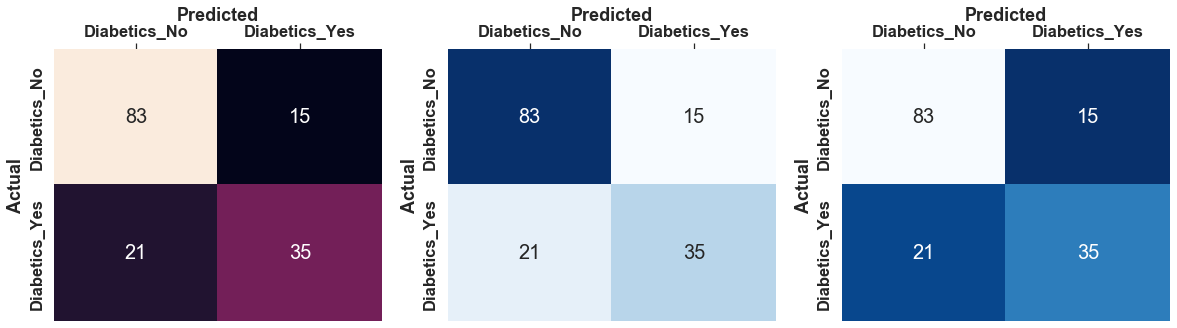

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig,(ax,ax1,ax2) = plt.subplots(1,3)
fig.set_size_inches(20,5)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,annot_kws={"size": 20},cbar=False,ax=ax)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),cmap="Blues",annot=True,annot_kws={"size": 20},cbar=False,ax=ax1)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),cmap="Blues_r",annot=True,annot_kws={"size": 20},cbar=False,ax=ax2)   
sns.set(font_scale=1.5)
ax.set_xlabel("Predicted",weight = "bold")
ax.set_ylabel("Actual",weight = "bold")
ax.xaxis.set_ticklabels(["Diabetics_No","Diabetics_Yes"],weight= "bold")
ax.yaxis.set_ticklabels(["Diabetics_No","Diabetics_Yes"],weight = "bold",va = "center")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
ax1.set_xlabel("Predicted",weight = "bold")
ax1.set_ylabel("Actual",weight = "bold")
ax1.xaxis.set_ticklabels(["Diabetics_No","Diabetics_Yes"],weight= "bold")
ax1.yaxis.set_ticklabels(["Diabetics_No","Diabetics_Yes"],weight = "bold",va = "center")
ax1.xaxis.set_label_position("top")
ax1.xaxis.tick_top()
ax2.set_xlabel("Predicted",weight = "bold")
ax2.set_ylabel("Actual",weight = "bold")
ax2.xaxis.set_ticklabels(["Diabetics_No","Diabetics_Yes"],weight= "bold")
ax2.yaxis.set_ticklabels(["Diabetics_No","Diabetics_Yes"],weight = "bold",va = "center")
ax2.xaxis.set_label_position("top")
ax2.xaxis.tick_top()

In [140]:
# ax.figure